In [25]:
pip install streamlit tensorflow pillow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 3.8 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.6/667.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
Using cached numpy-2.0.2-cp39-cp39-ma

In [26]:
import pandas as pd
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from sklearn.metrics import classification_report,accuracy_score
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
import streamlit as st

In [2]:
path = "/Users/vishvatejaguduguntla/Downloads/food11"
print(os.listdir(path))

['.DS_Store', 'test', 'train', 'validation']


In [3]:
path_train = "/Users/vishvatejaguduguntla/Downloads/food11/train"
print(os.listdir(path_train))
classes = os.listdir(path_train)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
    print(classes)

['Noodles-Pasta', 'Egg', '.DS_Store', 'Meat', 'Dessert', 'Rice', 'Vegetable-Fruit', 'Seafood', 'Dairy product', 'Bread', 'Soup', 'Fried food']
['Noodles-Pasta', 'Egg', 'Meat', 'Dessert', 'Rice', 'Vegetable-Fruit', 'Seafood', 'Dairy product', 'Bread', 'Soup', 'Fried food']


In [4]:
path_test = "/Users/vishvatejaguduguntla/Downloads/food11/test"
print(os.listdir(path_test))

['Noodles-Pasta', 'Egg', '.DS_Store', 'Meat', 'Dessert', 'Rice', 'Vegetable-Fruit', 'Seafood', 'Dairy product', 'Bread', 'Soup', 'Fried food']


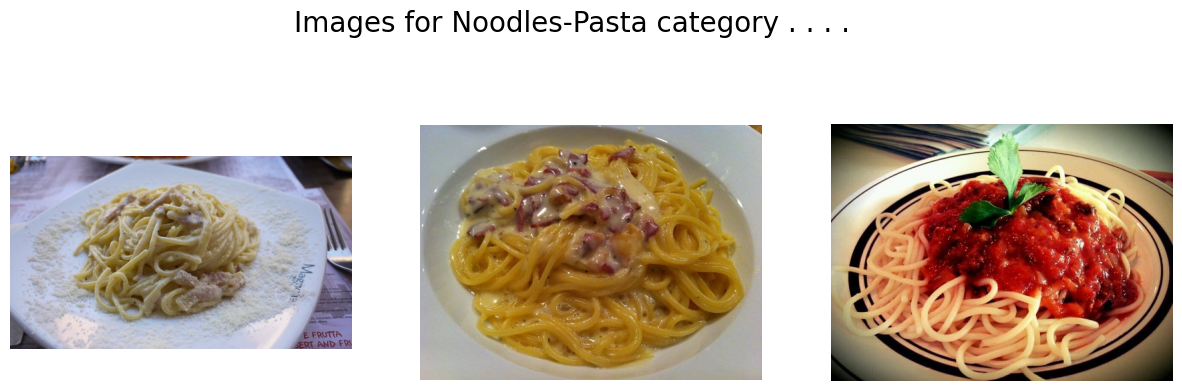

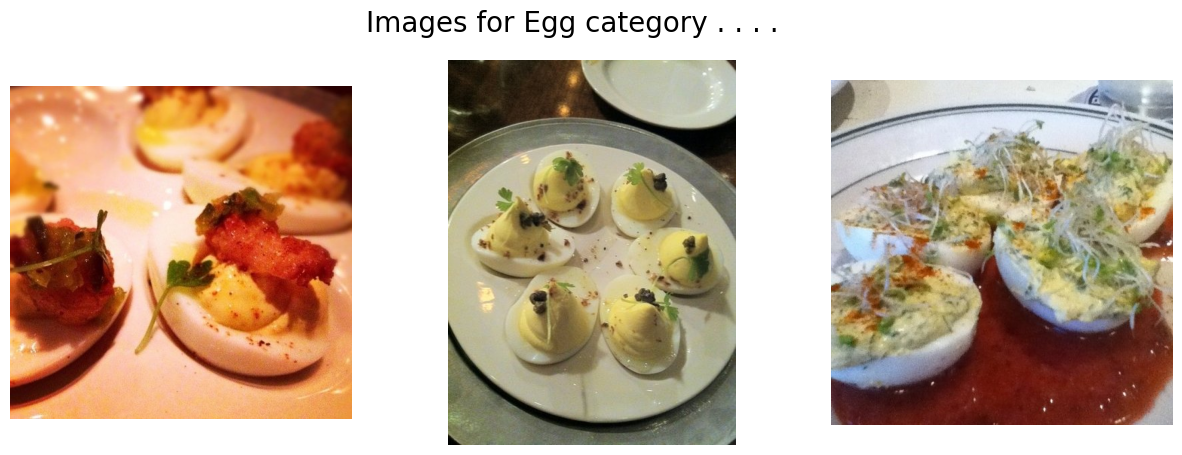

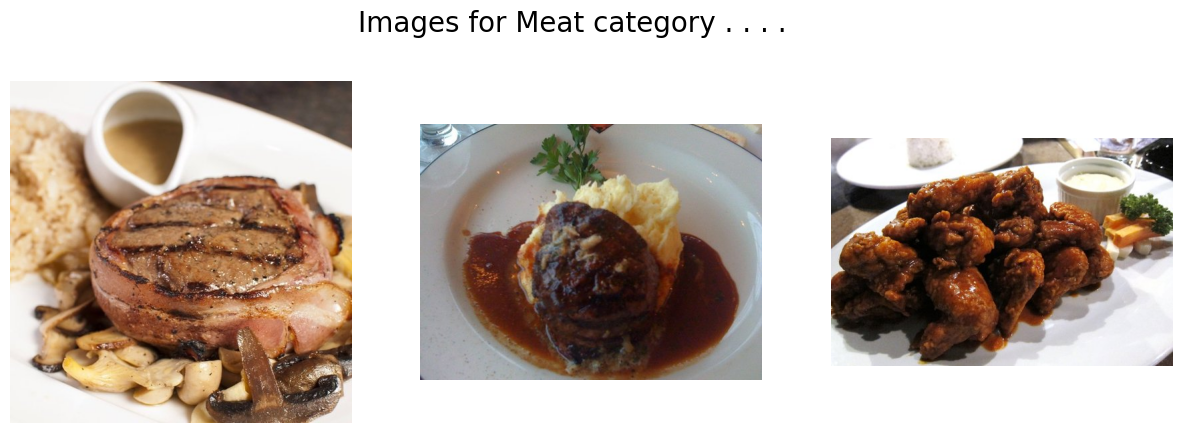

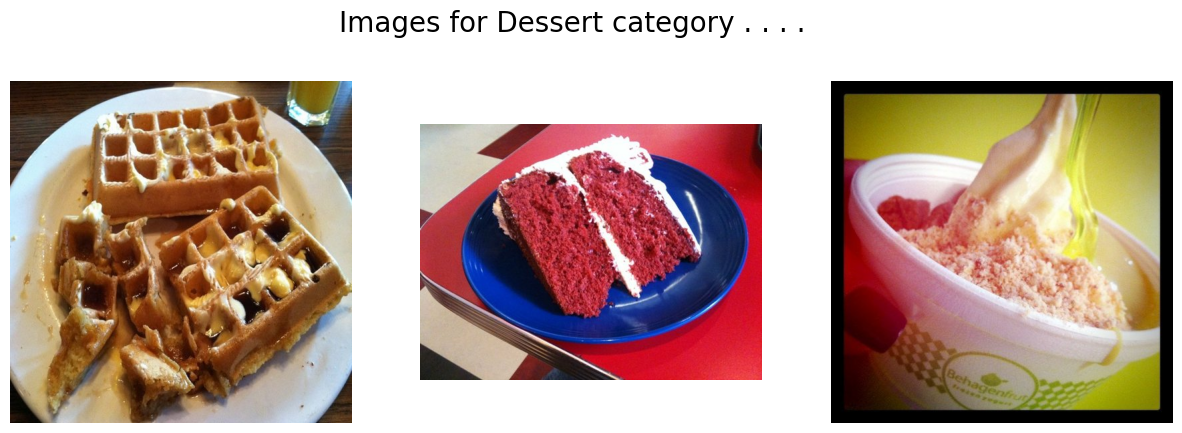

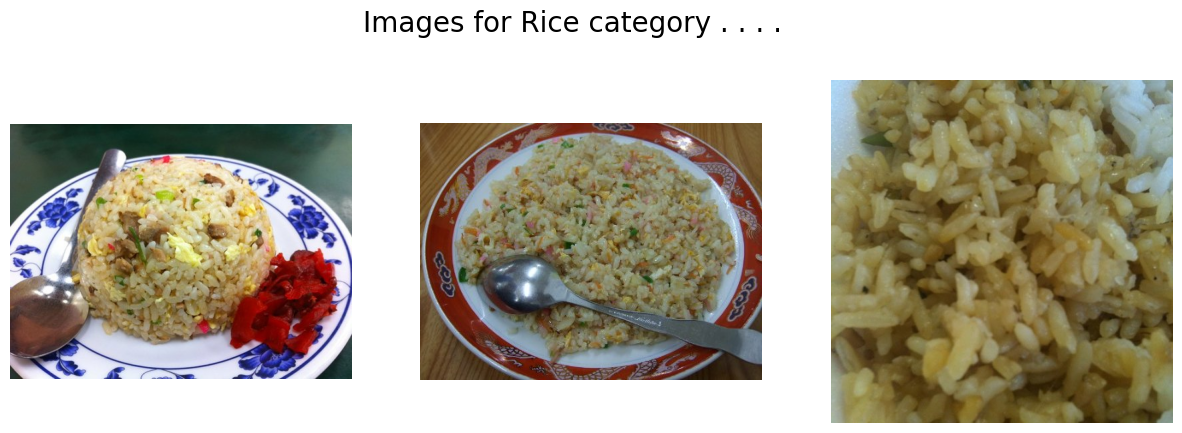

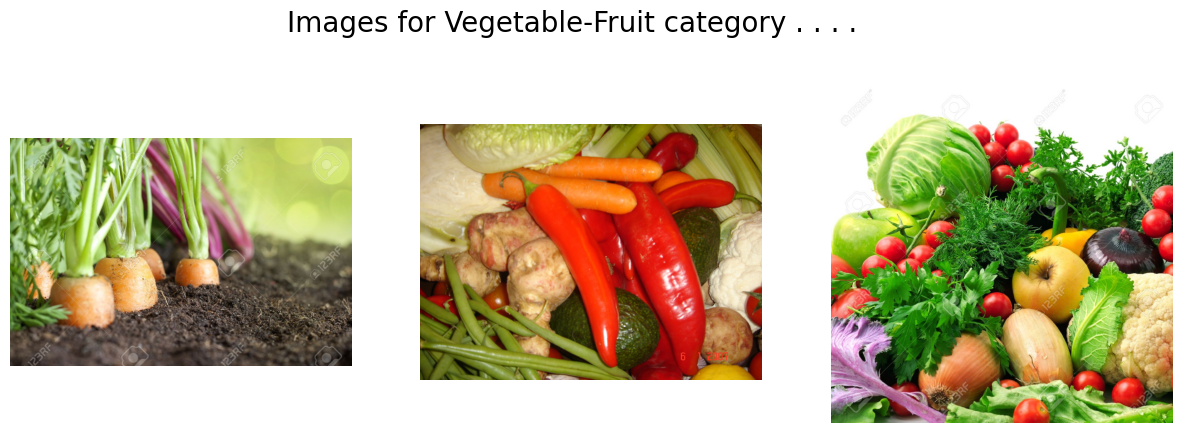

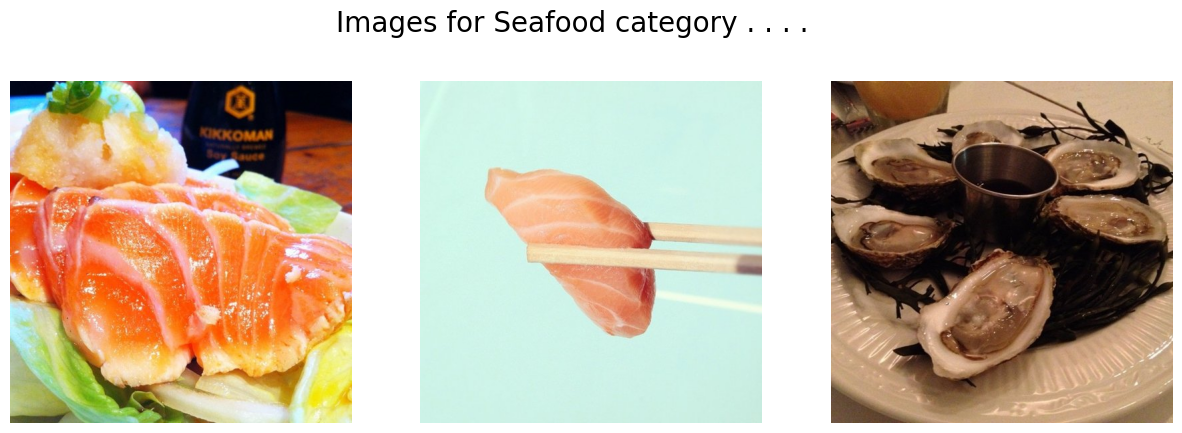

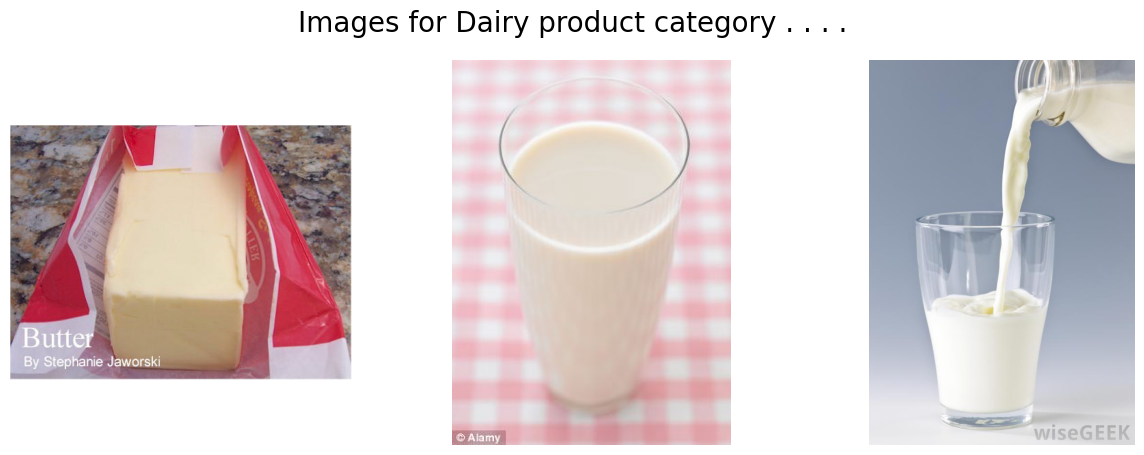

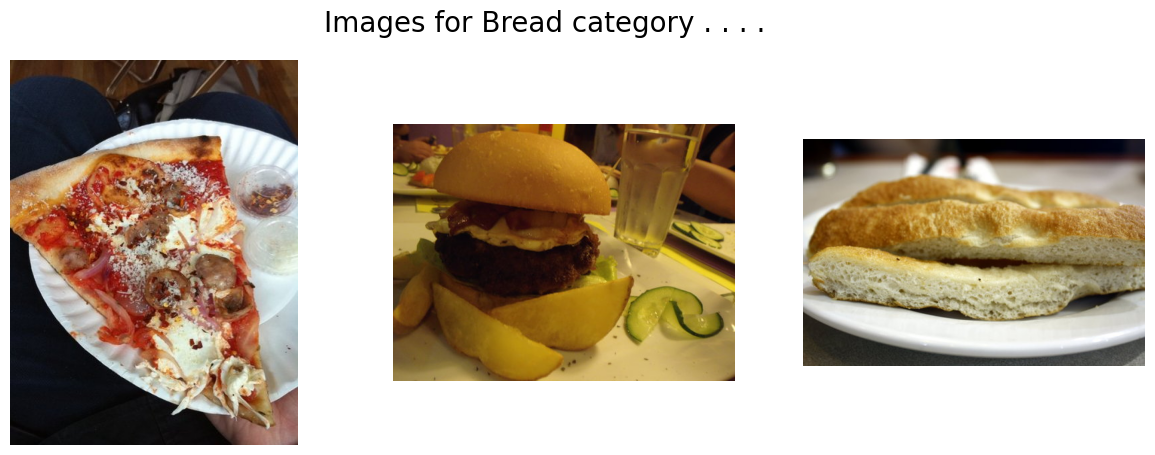

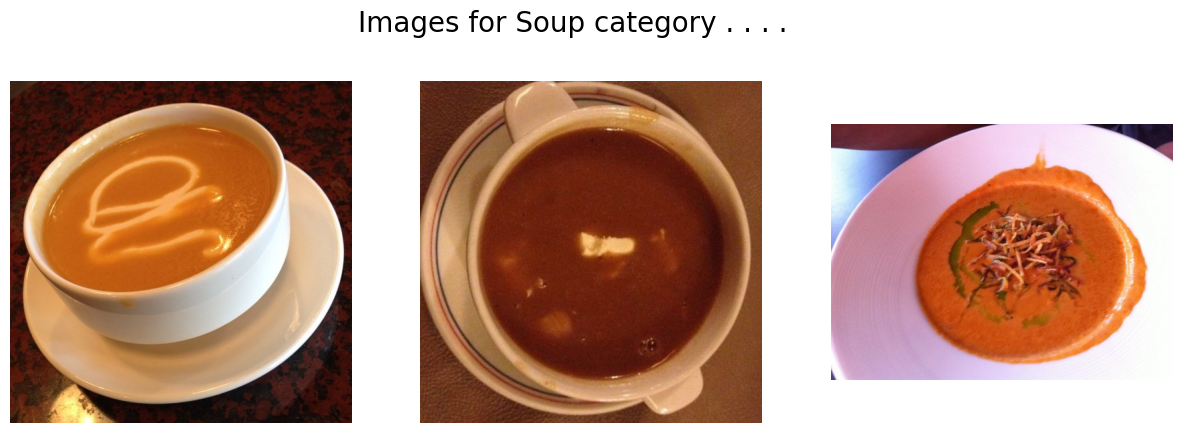

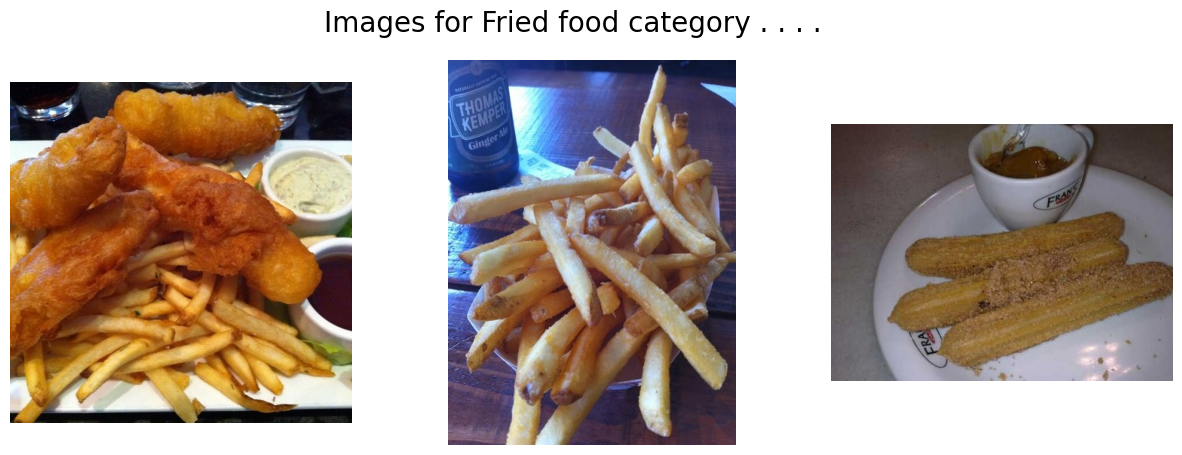

In [5]:
for cat in classes:
    if cat != ".DS_Store" and os.path.isdir(os.path.join(path_train, cat)):
        image_dir = os.path.join(path_train, cat)
        images = os.listdir(image_dir)
        images = [img for img in images if os.path.isfile(os.path.join(image_dir, img))]
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

        for i in range(3):
            if images:
                k = np.random.randint(0, len(images))
                img = np.array(Image.open(f'{path_train}/{cat}/{images[k]}'))
                ax[i].imshow(img)
                ax[i].axis('off')
            else:
                print(f"No images found in directory: {image_dir}")
        plt.show()

In [6]:
train_folder = [
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Noodles-Pasta",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Egg",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Meat",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Dessert",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Rice",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Vegetable-Fruit",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Seafood",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Dairy product",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Bread",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Soup",
    "/Users/vishvatejaguduguntla/Downloads/food11/train/Fried food"
]

test_folder = [
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Noodles-Pasta",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Egg",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Meat",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Dessert",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Rice",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Vegetable-Fruit",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Seafood",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Dairy product",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Bread",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Soup",
    "/Users/vishvatejaguduguntla/Downloads/food11/test/Fried food"
]

IMG_SIZE = 128
X_train, Y_train, X_test, Y_test = [], [], [], []


In [7]:
for i,train_path in  enumerate(train_folder):
  images = glob(f"{train_path}/*.*")
  print(f"Found {len(images)} images in {train_path}")

  for img in images:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X_train.append(img)
    Y_train.append(i)

Found 440 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Noodles-Pasta
Found 986 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Egg
Found 1325 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Meat
Found 1500 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Dessert
Found 280 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Rice
Found 709 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Vegetable-Fruit
Found 855 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Seafood
Found 429 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Dairy product
Found 994 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Bread
Found 1500 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Soup
Found 848 images in /Users/vishvatejaguduguntla/Downloads/food11/train/Fried food


In [8]:
for i,test_path in  enumerate(test_folder):
  images = glob(f"{test_path}/*.*")
  print(f"Found {len(images)} images in {test_path}")

  for img in images:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X_test.append(img)
    Y_test.append(i)

Found 147 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Noodles-Pasta
Found 335 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Egg
Found 432 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Meat
Found 500 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Dessert
Found 96 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Rice
Found 231 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Vegetable-Fruit
Found 303 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Seafood
Found 148 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Dairy product
Found 368 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Bread
Found 500 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Soup
Found 287 images in /Users/vishvatejaguduguntla/Downloads/food11/test/Fried food


In [9]:
x_val,y_val = [],[]
val_folder = [
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Noodles-Pasta",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Egg",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Meat",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Dessert",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Rice",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Vegetable-Fruit",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Seafood",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Dairy product",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Bread",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Soup",
    "/Users/vishvatejaguduguntla/Downloads/food11/validation/Fried food"
]
for i,val_path in  enumerate(val_folder):
  images = glob(f"{val_path}/*.*")
  print(f"Found {len(images)} images in {val_path}")

  for img in images:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    x_val.append(img)
    y_val.append(i)

Found 147 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Noodles-Pasta
Found 327 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Egg
Found 449 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Meat
Found 500 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Dessert
Found 96 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Rice
Found 232 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Vegetable-Fruit
Found 347 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Seafood
Found 144 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Dairy product
Found 362 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Bread
Found 500 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Soup
Found 326 images in /Users/vishvatejaguduguntla/Downloads/food11/validation/Fried food


In [10]:
X_val = np.array(x_val).astype('float32') / 255.0  
Y_val = np.array(y_val)

In [11]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [12]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (9866, 128, 128, 3)
Y_train shape: (9866,)
X_test shape: (3347, 128, 128, 3)
Y_test shape: (3347,)


In [13]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=11)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=11)

print("Y_train one-hot shape:", Y_train.shape)
print("Y_test one-hot shape:", Y_test.shape)

Y_train one-hot shape: (9866, 11)
Y_test one-hot shape: (3347, 11)


In [14]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, Y_train, batch_size=32, shuffle=True)

In [15]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(11, activation='softmax')  # 11 classes for Food11
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)         0

In [17]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [20]:
model.fit(train_generator,epochs = 30)

Epoch 1/30
309/309 [==============================] - 57s 183ms/step - loss: 1.2971 - accuracy: 0.5691
Epoch 2/30
309/309 [==============================] - 53s 172ms/step - loss: 1.2948 - accuracy: 0.5668
Epoch 3/30
309/309 [==============================] - 54s 175ms/step - loss: 1.2845 - accuracy: 0.5733
Epoch 4/30
309/309 [==============================] - 54s 173ms/step - loss: 1.2647 - accuracy: 0.5759
Epoch 5/30
309/309 [==============================] - 56s 181ms/step - loss: 1.2645 - accuracy: 0.5847
Epoch 6/30
309/309 [==============================] - 75s 244ms/step - loss: 1.2574 - accuracy: 0.5817
Epoch 7/30
309/309 [==============================] - 70s 226ms/step - loss: 1.2555 - accuracy: 0.5828
Epoch 8/30
309/309 [==============================] - 67s 215ms/step - loss: 1.2470 - accuracy: 0.5867
Epoch 9/30
309/309 [==============================] - 69s 224ms/step - loss: 1.2432 - accuracy: 0.5904
Epoch 10/30
309/309 [==============================] - 80s 260ms/step - l

In [21]:
model.evaluate(X_test,Y_test)

105/105 [==============================] - 5s 43ms/step - loss: 1.1512 - accuracy: 0.6206


[1.1511743068695068, 0.6205556988716125]

In [22]:
y_pred = model.predict(X_test)

In [24]:
model.save('food_class.h5')

In [27]:
class_names = [
    "Bread", "Dairy product", "Dessert", "Egg", "Fried food", 
    "Meat", "Noodles/Pasta", "Rice", "Seafood", "Soup", "Vegetable/Fruit"
]

# App Title
st.title("🍽️ Food-11 Image Classifier")
st.write("Upload a food image and get the predicted class!")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess the image (Resize according to your model's input)
    image = image.resize((224, 224))  # Change if your model uses a different size
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    st.markdown(f"### ✅ Prediction: **{predicted_class}**")
    st.markdown(f"Confidence: **{confidence:.2f}%**")

2025-04-08 21:58:33.046 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 21:58:33.232 
  command:

    streamlit run /opt/anaconda3/envs/tensorenv/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-08 21:58:33.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 21:58:33.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 21:58:33.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 21:58:33.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 21:58:33.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 21:58:33.234 Thread '

In [35]:
model = tf.keras.models.load_model('food_class.h5')

# Food-11 class names
class_names = [
    "Bread", "Dairy product", "Dessert", "Egg", "Fried food", 
    "Meat", "Noodles/Pasta", "Rice", "Seafood", "Soup", "Vegetable/Fruit"
]

def predict_food(image_path):
    """
    Predicts the class of a food image using the Food-11 model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: (predicted_class (str), confidence (float))
    """
    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    image = image.resize((224, 224))  # Use your model’s input size
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    confidence = float(np.max(predictions)) * 100

    pred, conf = predict_food("/Users/vishvatejaguduguntla/Downloads/food11/validation/Noodles-Pasta/5.jpg")
    print(f"Prediction: {pred} ({conf:.2f}%)")

In [ ]:
d